In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#Feature Store
from helpers import MongoDAO

#warnings
import warnings
warnings.filterwarnings('ignore')

In [130]:
#Load data
mongo = MongoDAO('admin', 'admin', 'localhost', 27017)
mongo.set_db('bra_paralelo')
mongo.set_collection('feature_store')
account_store_collection = mongo.get_collection()


In [131]:
#import data
data = pd.DataFrame(list(account_store_collection.find()))

In [132]:
pd.DataFrame({
    'columns': data.columns,
    'types': data.dtypes,
    'nulls': data.isnull().sum(),
    'missing': data.isnull().sum() / len(data),
    'unique': data.nunique()
})

,columns,types,nulls,missing,unique
_id,_id,object,0,0.000000,14641
account_id,account_id,object,0,0.000000,14641
churn,churn,int64,0,0.000000,2
ltv,ltv,float64,0,0.000000,5
months,months,int64,0,0.000000,5
product,product,object,0,0.000000,1
channel,channel,object,0,0.000000,3
date_of_birth,date_of_birth,object,0,0.000000,10995
country,country,object,1611,0.110033,26
post,post,float64,230,0.015709,1056


In [133]:
print('Numero de registros: {}'.format(len(data)))
print('Numero de colunas: {}'.format(len(data.columns)))

Numero de registros: 14641
Numero de colunas: 17


In [134]:
data.drop('_id', axis=1, inplace=True)

In [135]:
###############################################################################

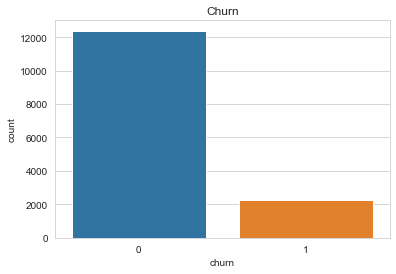

In [136]:
#Target
#countplot
sns.countplot(data['churn'])
plt.title('Churn')
plt.show()

Dataset desbalanceado

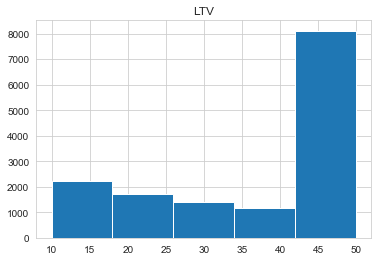

In [137]:
#Distribuition
data.ltv.hist(bins=5)
plt.title('LTV')
plt.show()

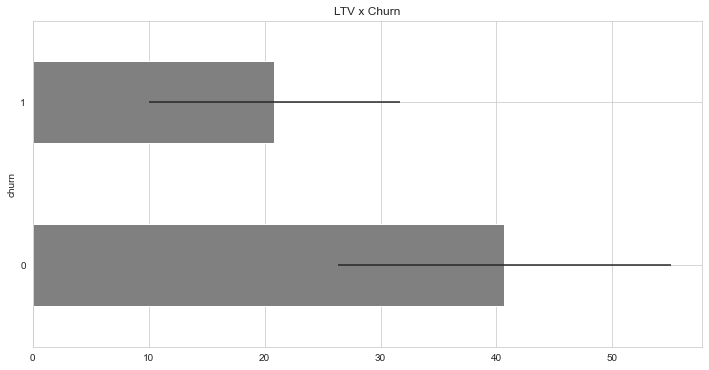

In [138]:
tmp = data.groupby('churn')['ltv'].agg(['mean', 'std'])
tmp.plot(
    kind="barh",
    y="mean",
    legend=False,
    xerr="std",
    title='LTV x Churn',
    color='gray',
    figsize=(12,6)
)
plt.show()

Ltv pode ser uma boa feature para o modelo, nos casos de churn positivo o valor de ltv é muito baixo, nos casos de churn negativo o valor de ltv é muito alto.

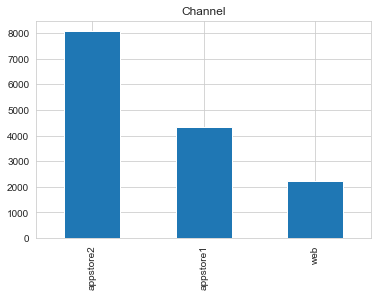

In [139]:
#Value counts channel
data.channel.value_counts().plot(kind='bar')
plt.title('Channel')
plt.show()


<AxesSubplot:xlabel='channel', ylabel='account_id'>

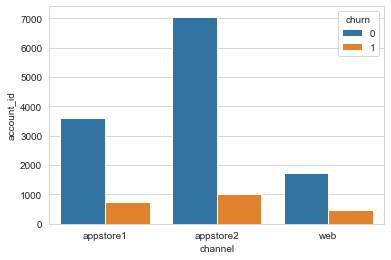

In [140]:
sns.barplot(x="channel", y="account_id", hue="churn", data=data.groupby(['channel','churn'])['account_id'].agg('count').reset_index())


In [141]:
from datetime import datetime
year_now = datetime.now().year
data['date_of_birth'] = pd.to_datetime(data['date_of_birth'])
data['idade']  = data.date_of_birth.apply(lambda x: year_now -  x.year)

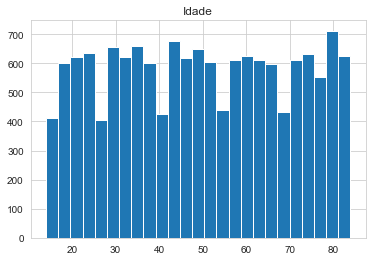

In [142]:
data.idade.hist(bins=25)
plt.title('Idade')
plt.show()

<AxesSubplot:xlabel='churn', ylabel='idade'>

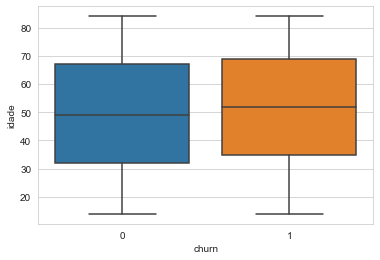

In [143]:
sns.boxplot(x='churn', y='idade', data=data)

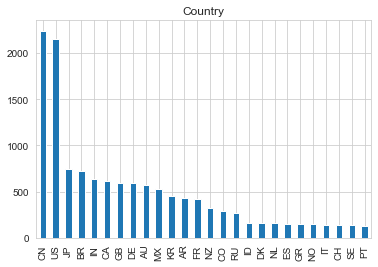

In [144]:
data.country.value_counts().plot(kind='bar')
plt.title('Country')
plt.show()

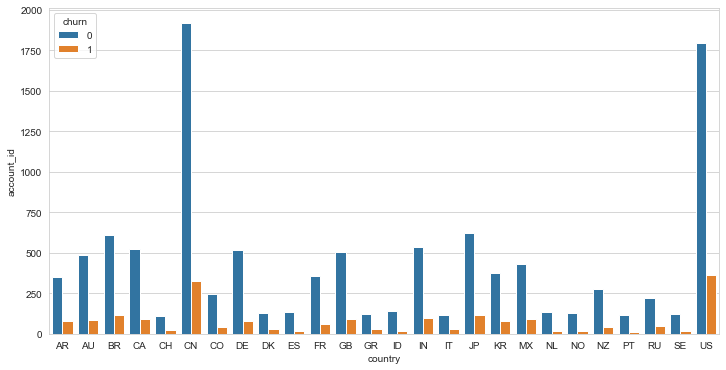

In [145]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x="country", y="account_id", hue="churn", data=data.groupby(['country','churn'])['account_id'].agg('count').reset_index())
plt.show()


In [146]:
data.drop('date_of_birth', axis=1, inplace=True)

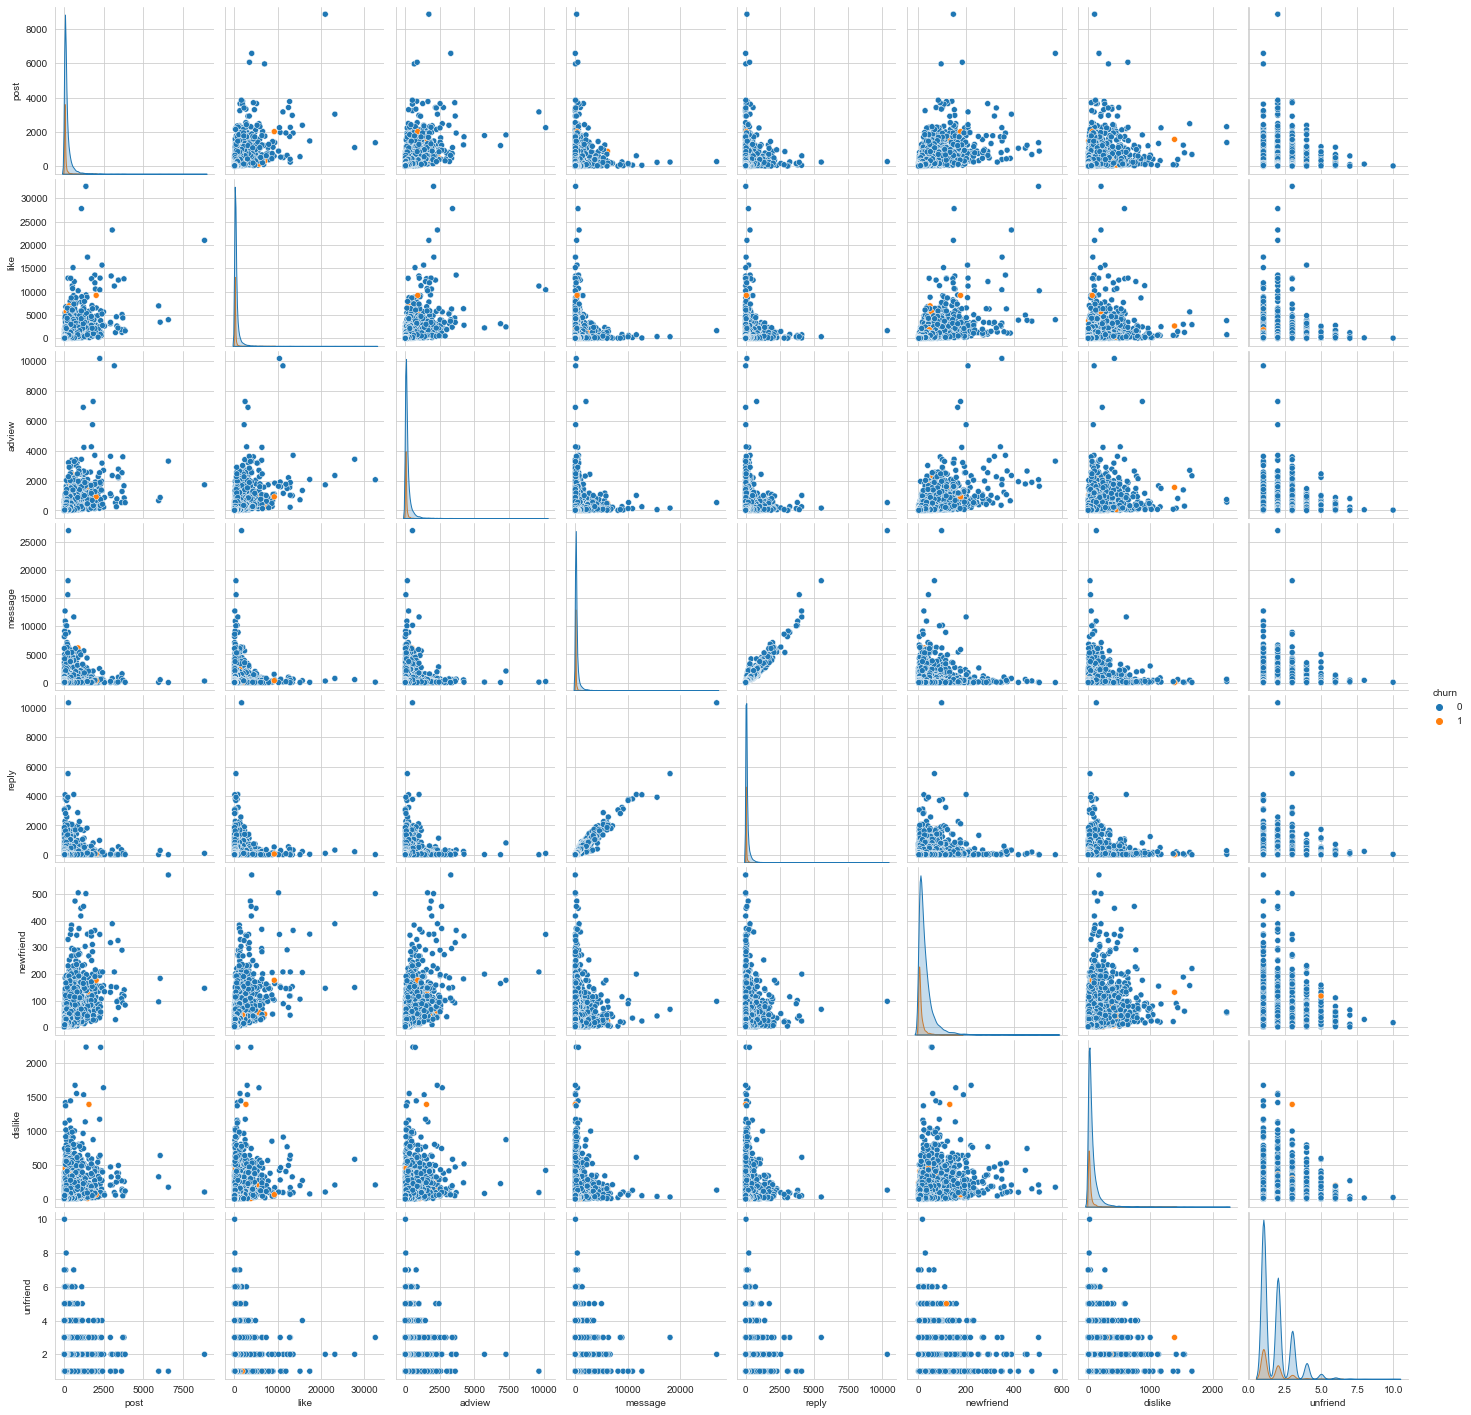

In [147]:
cols = ['post', 'like', 'adview', 'message', 'reply', 'newfriend', 'dislike',
       'unfriend','churn']

sns.pairplot(data[cols],hue = 'churn')

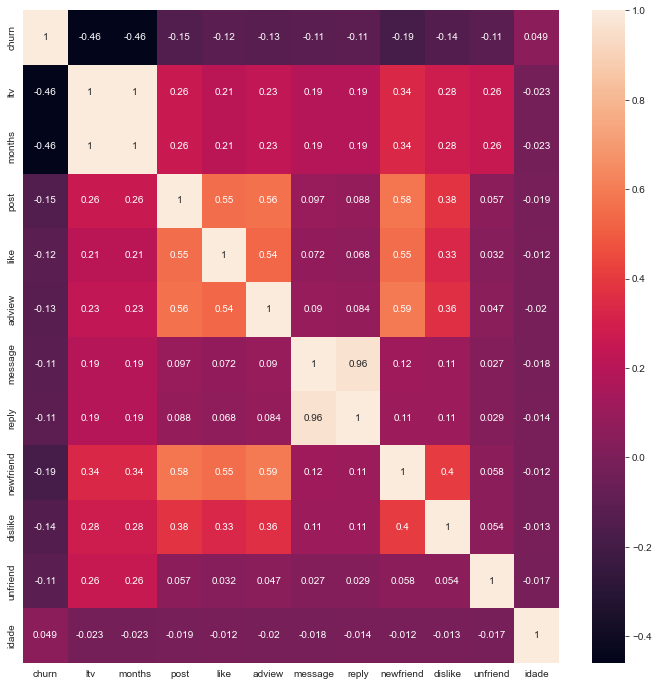

In [148]:
corr = data.corr()
fig = plt.figure(figsize=(12,12))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)
plt.show()


In [149]:
mongo_write = MongoDAO('admin', 'admin', 'localhost', 27017)
mongo_write.set_db('bra_paralelo')
mongo_write.set_collection('preprocessed_data')
mongo_write.get_collection().insert_many(data.to_dict('records'))